
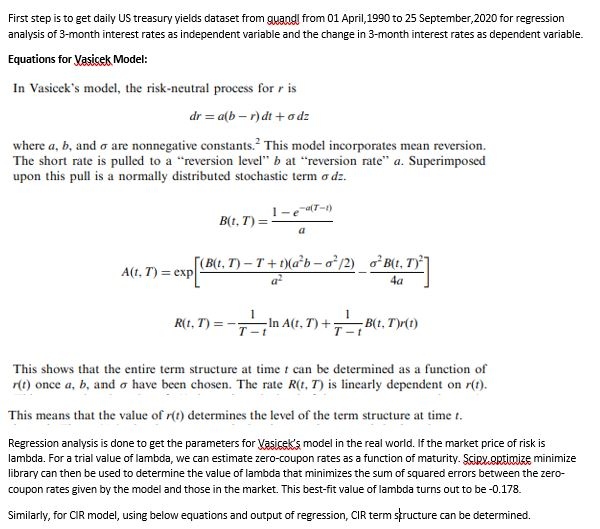


In [17]:
import matplotlib as mpl
import numpy as np
import pandas as pd

import scipy as sp
import datetime

import matplotlib.pylab as plt
import os
#from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

import seaborn as sbn
from scipy.stats import norm
from scipy.stats import lognorm
import statsmodels.api as sm
import statsmodels.formula.api as smf
#from pykalman import KalmanFilter
#from johansen import coint_johansen

from datetime import datetime
from dateutil import relativedelta
from scipy.stats import norm
import quandl
 # Feature Importance
from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC

In [18]:
quandl.ApiConfig.api_key = "5D7y9o9GoaTCkCuKyA-w"


In [19]:
'''get daily US treasury yields dataset from quandl from 01 April,1990 to 25 September,2020'''
yc = quandl.get("USTREASURY/YIELD", start_date="1990-04-01", end_date="2020-09-25") 

In [20]:
yc['three_month']=yc['3 MO']*0.01 #independent variable
yc['change']=yc['three_month'].shift(-1)-yc['three_month'] #dependent variable
yc[yc['change'].isnull()]

,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR,three_month,change
Date,,,,,,,,,,,,,,
2008-12-09,0.04,NaN,0.03,0.25,0.49,0.84,1.15,1.61,2.03,2.67,3.35,3.06,0.0003,NaN
2008-12-10,0.00,NaN,NaN,0.21,0.49,0.86,1.21,1.62,2.05,2.69,3.39,3.09,NaN,NaN
2008-12-17,0.03,NaN,0.05,0.19,0.45,0.73,0.98,1.35,1.70,2.20,3.01,2.66,0.0005,NaN
2008-12-18,0.03,NaN,NaN,0.15,0.43,0.68,0.92,1.26,1.59,2.08,2.86,2.53,NaN,NaN
2008-12-23,0.01,NaN,0.02,0.26,0.41,0.90,1.13,1.53,1.81,2.18,2.93,2.63,0.0002,NaN
2008-12-24,0.00,NaN,NaN,0.23,0.40,0.90,1.14,1.54,1.83,2.20,2.94,2.63,NaN,NaN
2020-09-25,0.08,0.09,0.10,0.11,0.12,0.12,0.15,0.26,0.45,0.66,1.19,1.40,0.0010,NaN


In [21]:
yc.dropna(subset=['change'],inplace=True) #data cleaning

In [22]:
from sklearn.linear_model import LinearRegression  #Linear regression using scikit model
reg = LinearRegression(fit_intercept=True)
reg.fit( yc['three_month'].values.reshape(-1,1),yc['change'].values.reshape(-1,1)) #reg.fit(X,Y)
print("The beta coefficient is {0} and \nThe intercept coefficient is {1}".format(reg.coef_, reg.intercept_))

The beta coefficient is [[-0.00051927]] and 
The intercept coefficient is [3.5457376e-06]


In [23]:
reg01=smf.ols('change~three_month',data=yc).fit() #Linear regression using statsmodel library
print(reg01.summary())
RMSE=(np.sqrt(reg01.mse_resid)) #Root Mean square of residual

                            OLS Regression Results                            
Dep. Variable:                 change   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.510
Date:                Sun, 06 Dec 2020   Prob (F-statistic):             0.0337
Time:                        13:59:24   Log-Likelihood:                 47444.
No. Observations:                7622   AIC:                        -9.488e+04
Df Residuals:                    7620   BIC:                        -9.487e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3.546e-06   8.55e-06      0.415      

In [24]:
sigma=RMSE*np.sqrt(250)  #standard deviation of short rate is annualized 
a=-reg01.params[1]*250 #using the annualized independent variable regression coefficient 
b_real=-reg01.params[0]/reg01.params[1] #using the ratio of dependent variable & indedpendent variable coefficients
print (a)
print (b_real)
print (sigma)

0.12981719882903636
0.006828327890441284
0.007576758370678858


In [25]:
yc.tail()

,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR,three_month,change
Date,,,,,,,,,,,,,,
2020-09-18,0.09,0.10,0.10,0.12,0.13,0.14,0.16,0.29,0.48,0.70,1.24,1.45,0.0010,0.0000
2020-09-21,0.09,0.10,0.10,0.11,0.12,0.14,0.16,0.27,0.46,0.68,1.22,1.43,0.0010,0.0000
2020-09-22,0.08,0.09,0.10,0.11,0.12,0.13,0.15,0.27,0.46,0.68,1.21,1.42,0.0010,0.0001
2020-09-23,0.08,0.09,0.11,0.11,0.13,0.14,0.15,0.28,0.46,0.68,1.21,1.42,0.0011,-0.0001
2020-09-24,0.08,0.09,0.10,0.11,0.12,0.14,0.16,0.27,0.46,0.67,1.19,1.40,0.0010,0.0000


In [26]:

r_0=yc['three_month'].iloc[-1] #Initialsing the starting short rate as the 3-month yields at end of 25th Sep,2020


In [27]:
def vasicek(a,T,b,sigma,t): #Function to calculate A & B parameters of Vasicek model
    B_vasicek=(1-np.exp(-a*(T-t)))/a
    A_vasicek=np.exp(((B_vasicek-T+t)*(a**2*b-sigma**2/2)/a**2)-(sigma**2*B_vasicek**2/(4*a)))
    return [A_vasicek,B_vasicek]

In [28]:
def yields(a,T,b,sigma,t,r): #Function to calculate Long Rate for Vasicek Model
    R=(-np.log(vasicek(a,T,b,sigma,t)[0])+vasicek(a,T,b,sigma,t)[1]*r)/(T-t)
    return R

In [29]:
out=[]   #List containing the Market yields for all the tenors as of end of dataset i.e. 25th Sep,2020
for i in range(3,12):
    o=yc.iloc[-1,i]*0.01
    out.append(o)

In [30]:
Maturity=[0.5,1.0,2.0,3.0,5.0,7.0,10.0,20.0,30.0] #List containing tenors of interest rates
t=0  #short rate time interval is set to zero

In [31]:
#Function which is to be minimized i.e. minimizes the sum of squared errors between the zero-coupon rates given by the model and those in the market and is passed to scipy.optimize minimize function 
def min_func(x): 
    D=[]
    trial_lambda=x
    for k in range(0,len(Maturity)):
        b_riskneutral=b_real-trial_lambda*sigma/a
        R=[yields(a,j,b_riskneutral,sigma,t,r_0) for j in Maturity]
        diff_square=(R[k]-out[k])**2
        D.append(diff_square)
    SS=sum(D)
    return SS  
       

In [32]:
from scipy.optimize import least_squares
from scipy.optimize import minimize
from scipy.optimize import fmin
input = 2
#res = least_squares(min_func, input)
res=minimize(min_func, input, method='nelder-mead') # Calculates the best fit value of lambda
#fmin(min_func,np.array([2]))
res

 final_simplex: (array([[-0.17763672],
       [-0.17773438]]), array([2.28489336e-05, 2.28489538e-05]))
           fun: 2.284893358507663e-05
       message: 'Optimization terminated successfully.'
          nfev: 36
           nit: 18
        status: 0
       success: True
             x: array([-0.17763672])

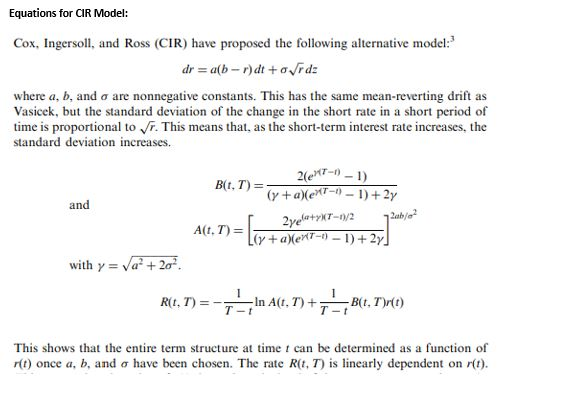

In [33]:
def calib(x): #Vasicek Model calibration by using the best fit lambda and estimating the term structure using 25th Sep, 2020 short rate
    D=[]
    trial_lambda=x
    check=[]
    for k in range(0,len(Maturity)):
        b_riskneutral=b_real-trial_lambda*sigma/a   # Risk neutral model parameters estimated from real world parameters obtained from regression.
        R=[yields(a,j,b_riskneutral,sigma,t,r_0) for j in Maturity]
        diff_square=(R[k]-out[k])**2
        D.append(diff_square)
        ch=R[k]*100
        check.append(ch)
    SS=sum(D)
    plt.plot(Maturity,check)
    plt.title('Calibration of zero rates using vasicek model')
    plt.ylabel('interest rates')
    plt.xlabel('tenors')
    
    return plt.show()

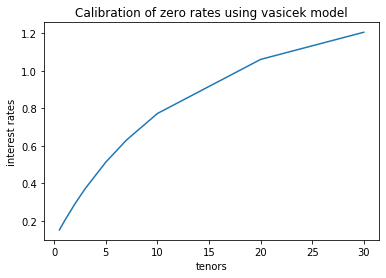

In [34]:
calib(res.x)

In [35]:
def CIR(a,T,b,sigma,t): #Function to calculate A & B parameters of CIR model
    gamma=np.sqrt(a**2+2*sigma**2)
    B_CIR=(np.exp(gamma*(T-t))-1)*2/((gamma+a)*(np.exp(gamma*(T-t))-1)+2*gamma)
    A_CIR=(np.exp((a+gamma)*(T-t)/2)*2*gamma/((gamma+a)*(np.exp(gamma*(T-t))-1)+2*gamma))**(2*a*b/(sigma**2))
    return [A_CIR,B_CIR]

In [36]:
def CIR_yields(a,T,b,sigma,t,r):   #Function to calculate Long Rate for CIR Model
    R=(-np.log(CIR(a,T,b,sigma,t)[0])+CIR(a,T,b,sigma,t)[1]*r)/(T-t)
    return R

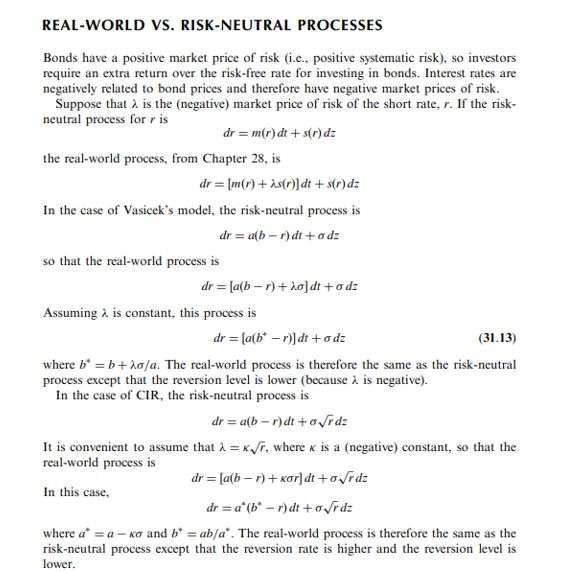

In [37]:
def CIR_Calib():     #CIR Model calibration by using the best fit lambda and estimating the term structure using 25th Sep, 2020 short rate
    
    kappa=res.x/np.sqrt(r_0)
    a_riskneutral=a+kappa*sigma # Risk neutral model parameters estimated from real world parameters obtained from regression.
    b_CIR_riskneutral=b_real*a/a_riskneutral # Risk neutral model parameters estimated from real world parameters obtained from regression.
    R_CIR=[CIR_yields(a_riskneutral,j,b_CIR_riskneutral,sigma,t,r_0)*100 for j in Maturity]
    plt.plot(Maturity,R_CIR)
    plt.title('Calibration of zero rates using CIR model')
    plt.ylabel('interest rates')
    plt.xlabel('tenors')
    
    return plt.show()

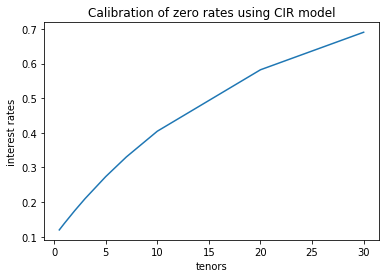

In [38]:
CIR_Calib()

In [39]:
Time=[x+0.25 for x in np.arange(0.0,10.0,0.25)] #List containing Matuirties for simulations

In [40]:
def Vas_sim(r0,sigma,a,b): #Function to simulate the Vasicek model for long rate maturity of 10 yrs at different short rate intervals, given the model paramters
  
    
    P=[] 
    LR = []    #empty list for collecting future stock prices
    T=10.0     #default T is equal to 10 years
    
    for j in Time:
        #sp.random.seed(12345)
        rt=r0+a*(b-r_0)*(0.25)+sigma*np.random.normal(0,1)*np.sqrt(0.25) 
        r0=rt
        R=yields(a,10.0,b,sigma,t,rt)
        P.append(rt)
        LR.append(R)
    return pd.DataFrame ((zip(P,LR)),columns=['short rate','long rate'])

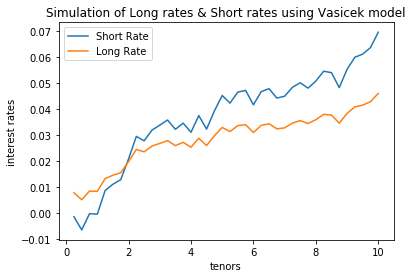

In [44]:

plt.plot(Time,Vas_sim(r_0,0.01,0.14,0.02))      # arbitary sample values for  a, b and sigma
plt.title('Simulation of Long rates & Short rates using Vasicek model')
plt.ylabel('interest rates')
plt.xlabel('tenors')
plt.legend(['Short Rate', 'Long Rate'])
plt.show()

In [42]:
def CIR_sim(r0,sigma,a,b):#Function to simulate the CIR model for long rate maturity of 10 yrs at different short rate intervals keeping the same model paramters used in Vasicek model simulation
  
    
    P=[] 
    LR = []#empty list for collecting future stock prices
    T=10.0     #default T is equal to 10 years
    
    for j in Time:
        #sp.random.seed(12345)
        rt=r0+a*(b-r_0)*(0.25)+sigma*np.sqrt(r0)*np.random.normal(0,1)*np.sqrt(0.25) 
        r0=rt
        R=CIR_yields(a,10.0,b,sigma/np.sqrt(r0),t,rt) #Adjusting the sigma of CIR model with respect to Vasicek Model while keeping other model paramters same as used in Vasicek model so that term structure is comparable
        P.append(rt)
        LR.append(R)
    return pd.DataFrame ((zip(P,LR)),columns=['short rate','long rate'])

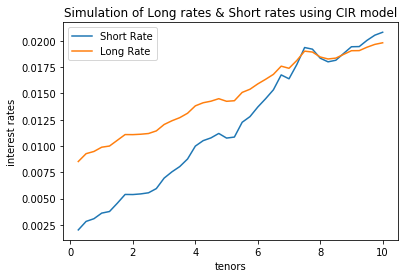

In [43]:

plt.plot(Time,CIR_sim(r_0,0.01,0.14,0.02))  # arbitary sample values for  a, b and sigma
plt.title('Simulation of Long rates & Short rates using CIR model')
plt.ylabel('interest rates')
plt.xlabel('tenors')
plt.legend(['Short Rate', 'Long Rate'])
plt.show()